In [3]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from datetime import datetime
from collections import Counter
pd.set_option('display.precision', 2)

In [5]:
df=pd.read_csv("C:\\Users\\91782\\OneDrive\\Desktop\\Power BI\\CarMakers.csv")
df.head(8)

,Car ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,five,136,3.19,3.40,8.5,110,5500,19,25,15250
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,five,136,3.19,3.40,8.5,110,5500,19,25,17710
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,five,136,3.19,3.40,8.5,110,5500,19,25,18920


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car ID             195 non-null    int64  
 1   make               195 non-null    object 
 2   fuel-type          195 non-null    object 
 3   aspiration         195 non-null    object 
 4   num-of-doors       195 non-null    object 
 5   body-style         195 non-null    object 
 6   drive-wheels       195 non-null    object 
 7   engine-location    195 non-null    object 
 8   wheel-base         195 non-null    float64
 9   length             195 non-null    float64
 10  width              195 non-null    float64
 11  height             195 non-null    float64
 12  curb-weight        195 non-null    int64  
 13  num-of-cylinders   195 non-null    object 
 14  engine-size        195 non-null    int64  
 15  bore               195 non-null    float64
 16  stroke             195 non

In [9]:
df.describe()

,Car ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,98.00,98.90,174.26,65.89,53.86,2559.00,127.94,3.33,3.25,10.19,103.27,5099.49,25.37,30.84,13248.02
std,56.44,6.13,12.48,2.13,2.40,524.72,41.43,0.27,0.31,4.06,37.87,468.27,6.40,6.83,8056.33
min,1.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,49.50,94.50,166.30,64.05,52.00,2145.00,98.00,3.15,3.11,8.50,70.00,4800.00,19.50,25.00,7756.50
50%,98.00,97.00,173.20,65.40,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5100.00,25.00,30.00,10245.00
75%,146.50,102.40,184.05,66.90,55.65,2943.50,145.50,3.59,3.41,9.40,116.00,5500.00,30.00,35.00,16509.00
max,195.00,120.90,208.10,72.00,59.80,4066.00,326.00,3.94,4.17,23.00,262.00,6600.00,49.00,54.00,45400.00


In [11]:
make_count=df['make'].unique()
print(make_count)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [13]:
mean_price=df.groupby('make')['price'].mean()
print(mean_price)

make
alfa-romero      15498.33
audi             17859.17
bmw              26118.75
chevrolet         6007.00
dodge             7875.44
honda             8184.69
isuzu             8916.50
jaguar           34600.00
mazda             9924.54
mercedes-benz    33647.00
mercury          16503.00
mitsubishi        9239.77
nissan           10415.67
peugot           15489.09
plymouth          7963.43
porsche          31400.50
saab             15223.33
subaru            8541.25
toyota            9885.81
volkswagen       10077.50
volvo            18063.18
Name: price, dtype: float64


In [15]:
Avg_make_citympg=df.groupby('make')['city-mpg'].mean().sort_values(ascending=False)
print(Avg_make_citympg)

make
chevrolet        41.00
honda            30.38
volkswagen       28.58
mazda            28.46
plymouth         28.14
dodge            28.00
toyota           27.50
nissan           27.00
subaru           26.33
mitsubishi       24.92
isuzu            24.00
peugot           22.45
volvo            21.18
saab             20.33
alfa-romero      20.33
bmw              19.38
audi             19.33
mercury          19.00
mercedes-benz    18.50
porsche          17.50
jaguar           14.33
Name: city-mpg, dtype: float64


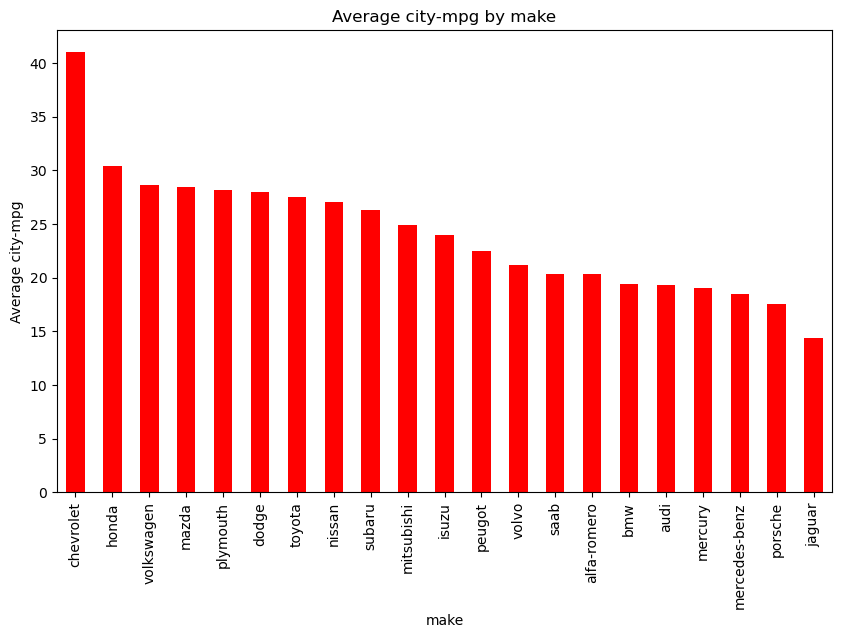

In [17]:
plt.figure(figsize=(10,6))
Avg_make_citympg.plot(kind='bar',color='red')
plt.xlabel('make')
plt.ylabel('Average city-mpg')
plt.title('Average city-mpg by make')
plt.show()

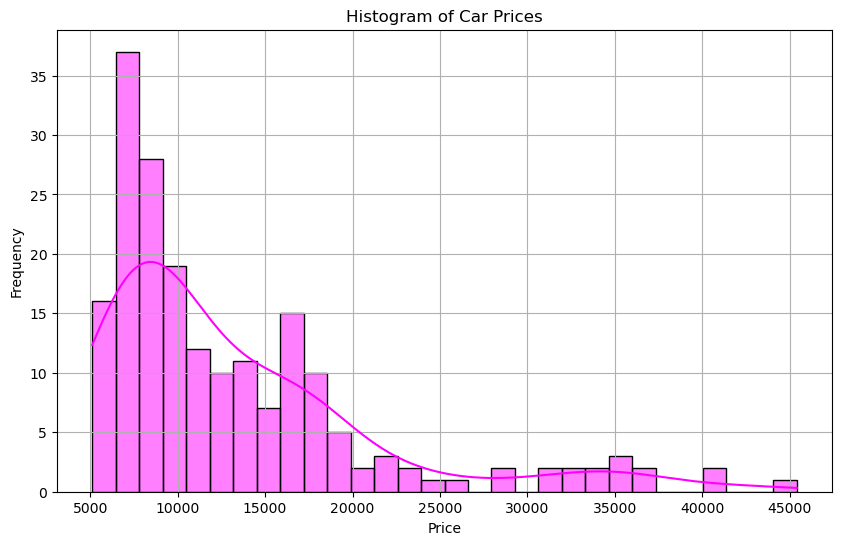

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True,bins=30,color='magenta')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

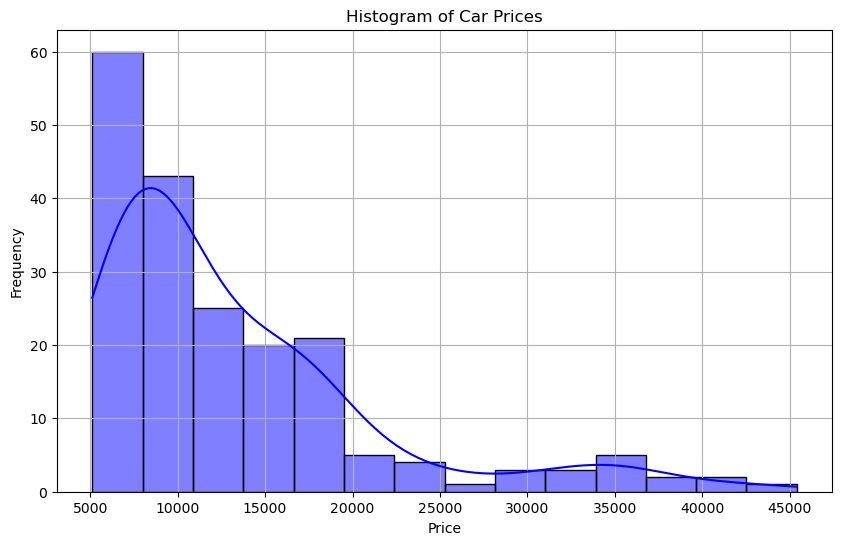

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

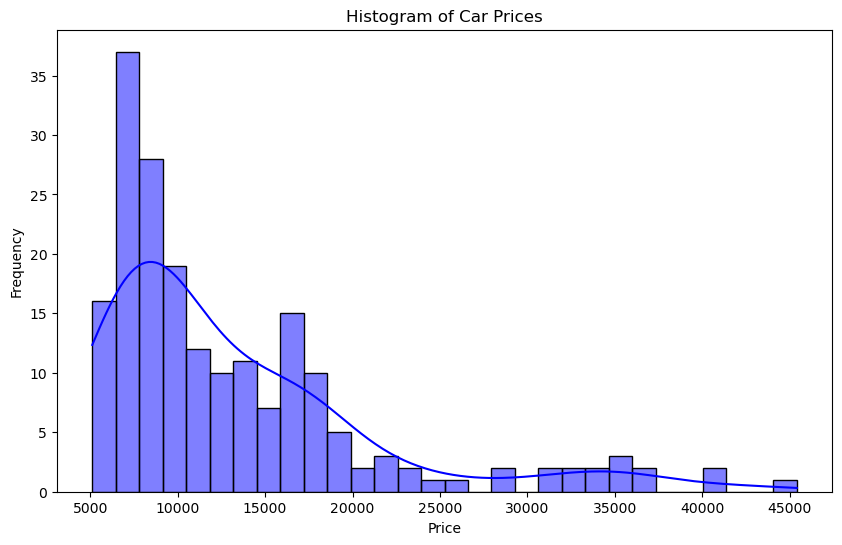

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title("Histogram of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

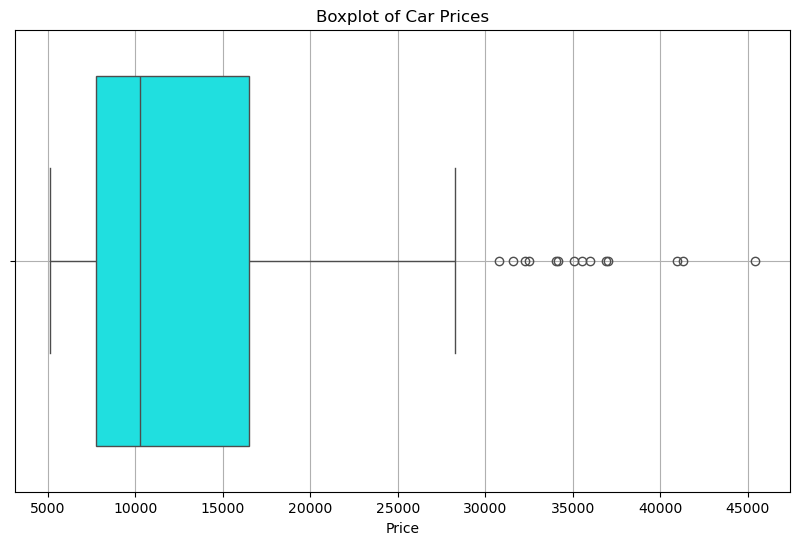

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'], color='cyan')
plt.title("Boxplot of Car Prices")
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [25]:
df['price'].quantile()

10245.0

In [27]:
horsepower_stats = df.groupby("body-style")["horsepower"].describe()
print(horsepower_stats)

             count    mean    std   min     25%    50%     75%    max
body-style                                                           
convertible    6.0  131.67  42.56  90.0  111.00  113.5  145.25  207.0
hardtop        8.0  142.25  50.61  69.0  116.00  119.5  189.75  207.0
hatchback     63.0   96.92  36.64  48.0   68.00   84.0  116.00  200.0
sedan         94.0  103.81  37.24  52.0   72.25   97.0  116.00  262.0
wagon         24.0   97.75  28.54  62.0   80.50   94.5  111.75  162.0


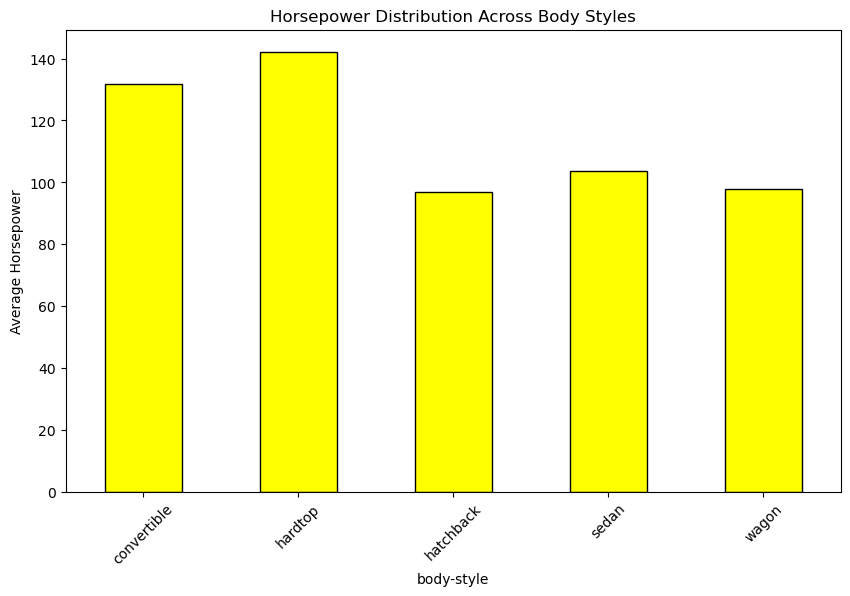

In [31]:
plt.figure(figsize=(10,6))
df.groupby('body-style')['horsepower'].mean().plot(kind='bar',color='yellow', edgecolor='black')
plt.xlabel("body-style")
plt.ylabel("Average Horsepower")
plt.title("Horsepower Distribution Across Body Styles")
plt.xticks(rotation=45)
plt.show()

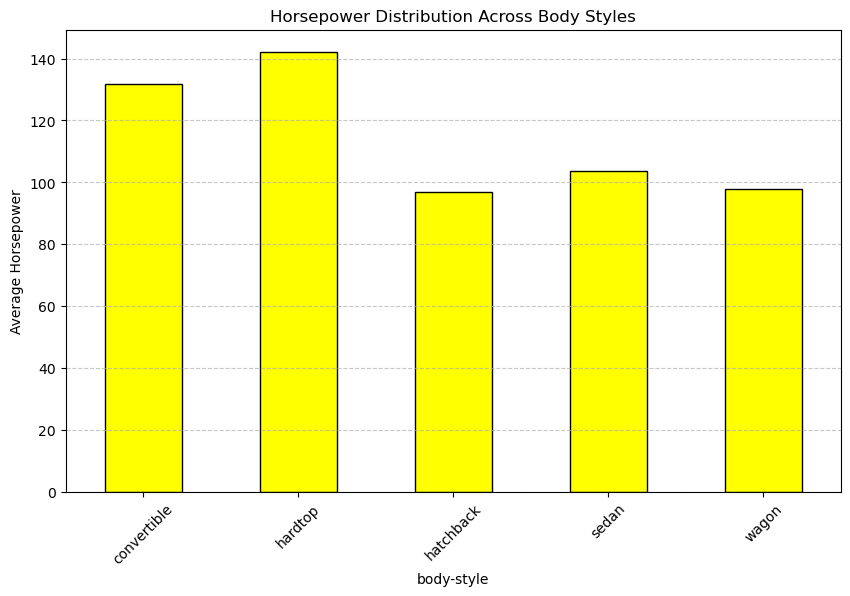

In [33]:
plt.figure(figsize=(10,6))
df.groupby('body-style')['horsepower'].mean().plot(kind='bar',color='yellow', edgecolor='black')
plt.xlabel("body-style")
plt.ylabel("Average Horsepower")
plt.title("Horsepower Distribution Across Body Styles")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [35]:
fuel_distribution=df['fuel-type'].value_counts()
print(fuel_distribution)

fuel-type
gas       175
diesel     20
Name: count, dtype: int64


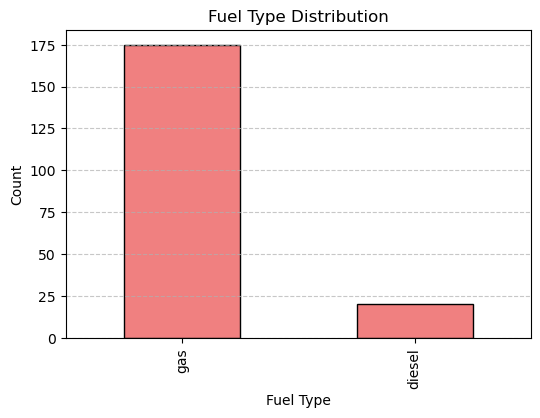

In [37]:
plt.figure(figsize=(6, 4))
fuel_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Fuel Type Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [39]:
most_common_drive_wheels = df.groupby("make")["drive-wheels"].agg(lambda x: x.value_counts().idxmax())
print(most_common_drive_wheels)

make
alfa-romero      rwd
audi             fwd
bmw              rwd
chevrolet        fwd
dodge            fwd
honda            fwd
isuzu            rwd
jaguar           rwd
mazda            fwd
mercedes-benz    rwd
mercury          rwd
mitsubishi       fwd
nissan           fwd
peugot           rwd
plymouth         fwd
porsche          rwd
saab             fwd
subaru           fwd
toyota           fwd
volkswagen       fwd
volvo            rwd
Name: drive-wheels, dtype: object


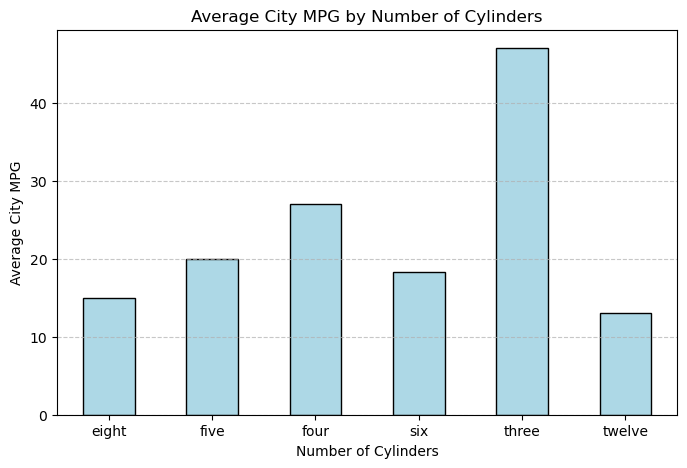

In [41]:
mpg_by_cylinders = df.groupby("num-of-cylinders")["city-mpg"].mean()
plt.figure(figsize=(8, 5))
mpg_by_cylinders.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel("Number of Cylinders")
plt.ylabel("Average City MPG")
plt.title("Average City MPG by Number of Cylinders")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [43]:
top_expensive_cars = df.sort_values(by="price", ascending=False).head(10)
print(top_expensive_cars)

     Car ID           make fuel-type aspiration num-of-doors   body-style  \
67       68  mercedes-benz       gas        std          two      hardtop   
15       16            bmw       gas        std          two        sedan   
66       67  mercedes-benz       gas        std         four        sedan   
121     122        porsche       gas        std          two  convertible   
16       17            bmw       gas        std         four        sedan   
46       47         jaguar       gas        std          two        sedan   
45       46         jaguar       gas        std         four        sedan   
65       66  mercedes-benz       gas        std          two  convertible   
64       65  mercedes-benz       gas        std         four        sedan   
120     121        porsche       gas        std          two      hardtop   

    drive-wheels engine-location  wheel-base  length  ...  num-of-cylinders  \
67           rwd           front       112.0   199.2  ...             eig

In [45]:
avg_house_make=df.groupby('make')['horsepower'].mean()
highest_avg_make=avg_house_make.idxmax()
highest_avg_hp=avg_house_make.max()
print(f"The car make with the highest average horsepower is {highest_avg_make} with an average horsepower of {highest_avg_hp:.2f}")

The car make with the highest average horsepower is jaguar with an average horsepower of 204.67


In [47]:
print(highest_avg_make)

jaguar


In [49]:
print(highest_avg_hp)

204.66666666666666


In [51]:
price_trends=df.groupby(['fuel-type','aspiration'])['price'].mean()
print(price_trends)

fuel-type  aspiration
diesel     std            9670.57
           turbo         19159.15
gas        std           12700.63
           turbo         14613.22
Name: price, dtype: float64


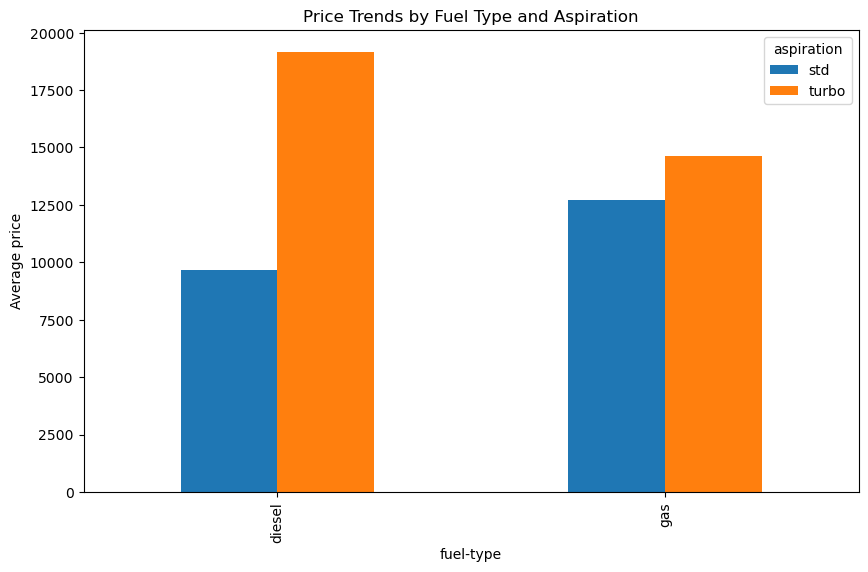

In [53]:
price_trends.unstack().plot(kind="bar",figsize=(10,6),ylabel="Average price",title='Price Trends by Fuel Type and Aspiration')
plt.show()

In [55]:
mpg_comparison = df.groupby("make")[["city-mpg", "highway-mpg"]].mean()
print(mpg_comparison)

               city-mpg  highway-mpg
make                                
alfa-romero       20.33        26.67
audi              19.33        24.50
bmw               19.38        25.38
chevrolet         41.00        46.33
dodge             28.00        34.11
honda             30.38        35.46
isuzu             24.00        29.00
jaguar            14.33        18.33
mazda             28.46        34.69
mercedes-benz     18.50        21.00
mercury           19.00        24.00
mitsubishi        24.92        31.15
nissan            27.00        32.94
peugot            22.45        26.64
plymouth          28.14        34.14
porsche           17.50        25.50
saab              20.33        27.33
subaru            26.33        30.75
toyota            27.50        32.91
volkswagen        28.58        34.92
volvo             21.18        25.82


In [57]:
correlation=df['curb-weight'].corr(df['engine-size'])
print(f"correlation coefficient:{correlation:.2f}")

correlation coefficient:0.86


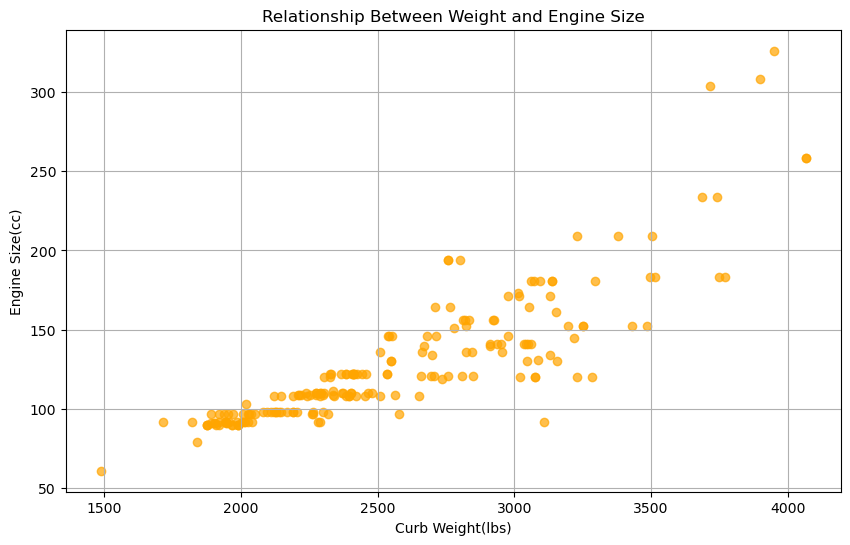

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(df['curb-weight'],df['engine-size'],color='orange',alpha=0.7)
plt.xlabel('Curb Weight(lbs)')
plt.ylabel('Engine Size(cc)')
plt.title('Relationship Between Weight and Engine Size')
plt.grid(True)
plt.show()

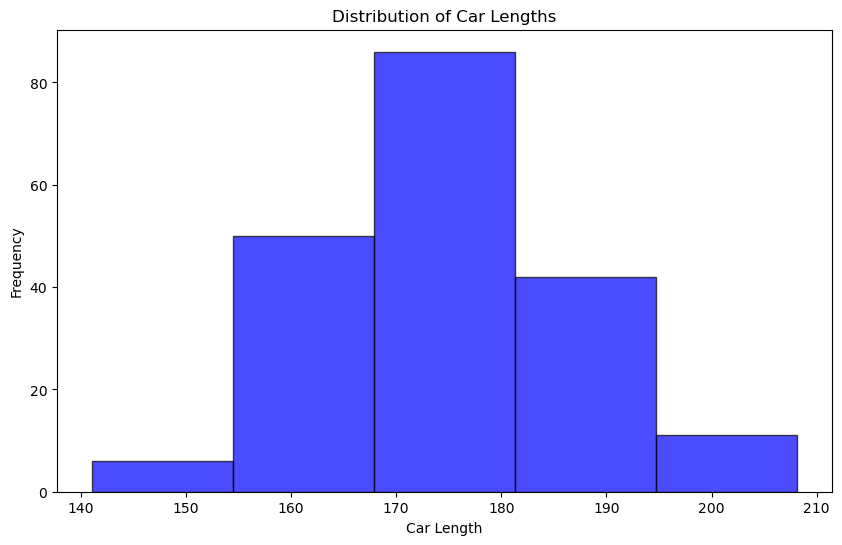

In [61]:
plt.figure(figsize=(10,6))
plt.hist(df['length'], bins=5,color='blue',edgecolor='black',alpha=0.7)
plt.xlabel('Car Length')
plt.ylabel('Frequency')
plt.title('Distribution of Car Lengths')
plt.show()